<a href="https://colab.research.google.com/github/rafijonathan/datamaining/blob/main/naive_bayes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import library

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

Mounted at /content/drive


In [8]:
import pandas as pd
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Social_Network_Ads.csv', sep=',')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

spliting

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25,random_state= 0)

scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

training the naive bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

predicting

In [17]:
y_pred = classifier.predict(x_test)

making the confusion matrik

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[65  3]
 [ 7 25]]


visualising the training set results

<ipython-input-22-1bce9b2e65e1>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],


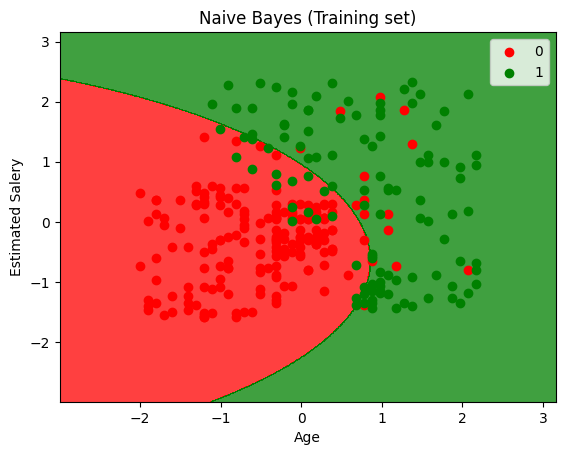

In [22]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step = 0.01,))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
              alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
              c= ListedColormap(('red','green'))(i),label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salery')
plt.legend()
plt.show()

visualising the test set result

<ipython-input-24-e03734c9d01f>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],


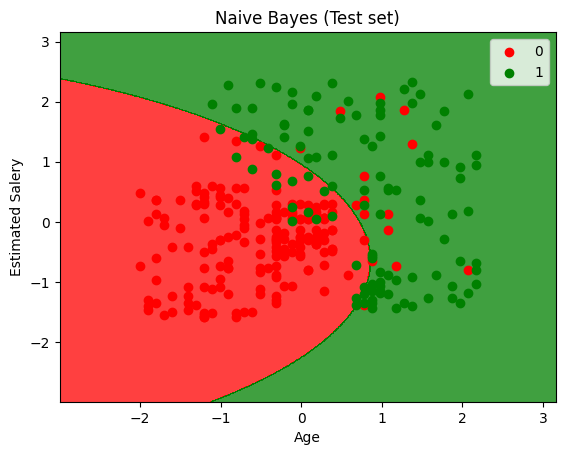

In [24]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step = 0.01),
                    np.arange(start = x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step = 0.01,))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
              alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],
              c= ListedColormap(('red','green'))(i),label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salery')
plt.legend()
plt.show()